<a href="https://colab.research.google.com/github/gillbatess/Academic-Projects/blob/main/RahulKumarSumitSuman_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MBA 934 - Applied Machine Learning**

**Assignment 2**

▶  Rahul Kumar (241561532) - krahul24@iitk.ac.in

▶  Sumit Suman (241561552) - sumitsuman24@iitk.ac.in


## **<font color="Teal">EDA (Exploratory Data Analysis)**

**<font color="Red">Data Source</font>**: Kaggle

**<font color="Red">Introduction</font>**

In this exploratory data analysis (EDA) project, we delve into a dataset containing comprehensive details on 5,682 soccer players, covering a range of physical, technical, and gameplay attributes. This dataset includes 40 columns, with key information such as player identity (`name`, `country`, and `club`), physical metrics (`height`, `weight`, and `age`), and a wide array of skill ratings like dribbling, ball control, and passing abilities. The dataset also features goalkeeping-specific attributes, as well as each player's market value, providing an opportunity to uncover patterns, relationships, and insights into the factors influencing player skills and market worth in the world of football.

### <font color="Brown">**Description of the data**</font>

In [37]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
#importing the data

df = pd.read_csv('/content/player_stats.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,97500
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1100000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,65000
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,30000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5682 non-null   object
 1   country         5682 non-null   object
 2   height          5682 non-null   int64 
 3   weight          5682 non-null   int64 
 4   age             5682 non-null   int64 
 5   club            5682 non-null   object
 6   ball_control    5682 non-null   int64 
 7   dribbling       5682 non-null   int64 
 8   slide_tackle    5682 non-null   int64 
 9   stand_tackle    5682 non-null   int64 
 10  aggression      5682 non-null   int64 
 11  reactions       5682 non-null   int64 
 12  att_position    5682 non-null   int64 
 13  interceptions   5682 non-null   int64 
 14  vision          5682 non-null   int64 
 15  composure       5682 non-null   int64 
 16  crossing        5682 non-null   int64 
 17  short_pass      5682 non-null   int64 
 18  long_pas

In [5]:
df.describe().apply(lambda x: round(x, 2))

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
count,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,...,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5682.00,5.682000e+03
mean,181.67,75.28,26.32,58.91,56.13,46.73,48.82,56.32,61.96,50.72,...,48.10,43.30,48.17,42.93,16.19,16.44,16.19,16.07,16.57,2.271115e+06
std,6.83,7.00,4.73,16.57,18.77,20.52,20.98,16.85,8.89,19.78,...,18.09,17.09,15.78,17.91,17.15,17.64,16.99,16.81,17.94,7.616233e+06
min,156.00,54.00,17.00,8.00,5.00,7.00,7.00,11.00,32.00,3.00,...,7.00,4.00,8.00,4.00,2.00,2.00,2.00,2.00,3.00,4.000000e+02
25%,177.00,70.00,23.00,55.00,51.00,27.00,30.00,45.00,56.00,40.00,...,36.00,32.00,39.00,30.00,8.00,8.00,8.00,8.00,8.00,3.500000e+04
50%,182.00,75.00,26.00,63.00,62.00,54.00,57.00,60.00,62.00,56.00,...,50.00,43.00,49.00,44.00,11.00,11.00,11.00,11.00,11.00,7.750000e+04
75%,186.00,80.00,30.00,69.00,68.00,64.00,66.00,69.00,68.00,65.00,...,62.00,56.00,60.00,57.00,14.00,14.00,14.00,14.00,14.00,1.600000e+06
max,204.00,102.00,41.00,94.00,95.00,87.00,91.00,96.00,93.00,93.00,...,93.00,94.00,92.00,90.00,90.00,90.00,87.00,90.00,89.00,1.535000e+08


**<font color="Red">Observation</font>**

* The dataset has 39 attributes and 5682 data objects.
* Most of the attribute looks like numerical data type except `player`'s name, `country`, and `club`.
* The value of the attributes showing the skill of the players are in the range of `0-100`.



### <font color="Brown">**Missing Values**</font>

In [6]:
df.isnull().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
slide_tackle,0
stand_tackle,0


In [7]:
df.describe()

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
count,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,...,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.00000,5682.000000,5682.000000,5682.000000,5.682000e+03
mean,181.670539,75.282295,26.316262,58.912179,56.128476,46.728441,48.820838,56.324006,61.959345,50.724921,...,48.099789,43.299542,48.174938,42.931890,16.187610,16.43805,16.191834,16.071982,16.570222,2.271115e+06
std,6.829238,6.998971,4.729967,16.567068,18.772075,20.519430,20.975966,16.846410,8.893309,19.780636,...,18.086672,17.086473,15.781737,17.912619,17.146572,17.63526,16.993154,16.808674,17.942154,7.616233e+06
min,156.000000,54.000000,17.000000,8.000000,5.000000,7.000000,7.000000,11.000000,32.000000,3.000000,...,7.000000,4.000000,8.000000,4.000000,2.000000,2.00000,2.000000,2.000000,3.000000,4.000000e+02
25%,177.000000,70.000000,23.000000,55.000000,51.000000,27.000000,30.000000,45.000000,56.000000,40.000000,...,36.000000,32.000000,39.000000,30.000000,8.000000,8.00000,8.000000,8.000000,8.000000,3.500000e+04
50%,182.000000,75.000000,26.000000,63.000000,62.000000,54.000000,57.000000,60.000000,62.000000,56.000000,...,50.000000,43.000000,49.000000,44.000000,11.000000,11.00000,11.000000,11.000000,11.000000,7.750000e+04
75%,186.000000,80.000000,30.000000,69.000000,68.000000,64.000000,66.000000,69.000000,68.000000,65.000000,...,62.000000,56.000000,60.000000,57.000000,14.000000,14.00000,14.000000,14.000000,14.000000,1.600000e+06
max,204.000000,102.000000,41.000000,94.000000,95.000000,87.000000,91.000000,96.000000,93.000000,93.000000,...,93.000000,94.000000,92.000000,90.000000,90.000000,90.00000,87.000000,90.000000,89.000000,1.535000e+08


### <font color="Brown">**Duplicate Values**</font>

In [8]:
#checking for duplicate entries and dropping the entries.
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 0 to 5681
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          5679 non-null   object
 1   country         5679 non-null   object
 2   height          5679 non-null   int64 
 3   weight          5679 non-null   int64 
 4   age             5679 non-null   int64 
 5   club            5679 non-null   object
 6   ball_control    5679 non-null   int64 
 7   dribbling       5679 non-null   int64 
 8   slide_tackle    5679 non-null   int64 
 9   stand_tackle    5679 non-null   int64 
 10  aggression      5679 non-null   int64 
 11  reactions       5679 non-null   int64 
 12  att_position    5679 non-null   int64 
 13  interceptions   5679 non-null   int64 
 14  vision          5679 non-null   int64 
 15  composure       5679 non-null   int64 
 16  crossing        5679 non-null   int64 
 17  short_pass      5679 non-null   int64 
 18  long_pass    

**<font color="Red">3 entries has been dropped due to the duplicate entries.</font>**

In [10]:
df.describe().apply(lambda x: round(x, 2))

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
count,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,...,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5679.00,5.679000e+03
mean,181.67,75.28,26.32,58.92,56.14,46.73,48.82,56.32,61.96,50.74,...,48.11,43.31,48.18,42.94,16.18,16.43,16.19,16.07,16.56,2.271909e+06
std,6.83,7.00,4.73,16.57,18.77,20.52,20.97,16.85,8.89,19.78,...,18.08,17.08,15.78,17.91,17.14,17.62,16.98,16.80,17.93,7.618131e+06
min,156.00,54.00,17.00,8.00,5.00,7.00,7.00,11.00,32.00,3.00,...,7.00,4.00,8.00,4.00,2.00,2.00,2.00,2.00,3.00,4.000000e+02
25%,177.00,70.00,23.00,55.00,51.00,27.00,30.00,45.00,56.00,40.00,...,36.00,32.00,39.00,30.00,8.00,8.00,8.00,8.00,8.00,3.500000e+04
50%,182.00,75.00,26.00,63.00,62.00,54.00,57.00,60.00,62.00,56.00,...,50.00,43.00,49.00,44.00,11.00,11.00,11.00,11.00,11.00,7.750000e+04
75%,186.00,80.00,30.00,69.00,68.00,64.00,66.00,69.00,68.00,65.00,...,62.00,56.00,60.00,57.00,14.00,14.00,14.00,14.00,14.00,1.600000e+06
max,204.00,102.00,41.00,94.00,95.00,87.00,91.00,96.00,93.00,93.00,...,93.00,94.00,92.00,90.00,90.00,90.00,87.00,90.00,89.00,1.535000e+08


### <font color="Brown">**Attribute Selection**</font>

We are using linear regression model to calculate the `p-value` of all the attributes using OLS method. We will only keep the attributes which are statistically significant.

In [11]:
# Select only numeric columns for independent variables
X = df.drop('value', axis=1).select_dtypes(include=[float, int])
y = df['value']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()



# Display p-values rounded to 4 decimal places
p_values = model.pvalues.round(4)
print("P-values for each feature (rounded to 4 decimal places):")
print(p_values)

P-values for each feature (rounded to 4 decimal places):
const             0.0000
height            0.0947
weight            0.3827
age               0.0000
ball_control      0.5901
dribbling         0.6090
slide_tackle      0.2632
stand_tackle      0.0980
aggression        0.1147
reactions         0.0000
att_position      0.1408
interceptions     0.1539
vision            0.0267
composure         0.0000
crossing          0.0033
short_pass        0.3599
long_pass         0.8745
acceleration      0.4757
stamina           0.9773
strength          0.5170
balance           0.5747
sprint_speed      0.2356
agility           0.1939
jumping           0.9074
heading           0.0246
shot_power        0.7846
finishing         0.0129
long_shots        0.0035
curve             0.0990
fk_acc            0.5990
penalties         0.3287
volleys           0.0144
gk_positioning    0.3201
gk_diving         0.1116
gk_handling       0.1615
gk_kicking        0.7450
gk_reflexes       0.5200
dtype: float64


The model gave us a surprising result. We would assume height, weight, stamina, strength etc. would play a significant role in decising a palyer's market value but it doesnt seems so. Based on the `p-values`, we can say, the following attributes play a major role in deciding the market value of a player.

1. `age`
2. `reactions`
3. `vision`
4. `composure`
5. `crossing`
6. `heading`
7. `finishing`
8. `long_shots`
9. `volleys`

In [12]:
#removing the attributes which are not statistically significant
# Keep only the specified columns
selected_columns = ['age', 'reactions', 'vision', 'composure', 'crossing', 'heading', 'finishing', 'long_shots', 'volleys', 'value']
df_selected = df[selected_columns]

# Now df_selected contains only the desired columns
df_selected.head()

,age,reactions,vision,composure,crossing,heading,finishing,long_shots,volleys,value
0,22,68,30,50,33,64,30,31,33,1400000
1,31,70,64,54,60,54,64,68,46,97500
2,29,65,49,48,14,17,14,20,16,1100000
3,33,64,29,70,44,67,24,33,19,65000
4,23,50,38,34,11,13,4,6,5,30000


In [13]:
df_selected.describe().applymap(lambda x: np.format_float_positional(x, precision=2))

<ipython-input-13-7f21af2acda5>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_selected.describe().applymap(lambda x: np.format_float_positional(x, precision=2))


,age,reactions,vision,composure,crossing,heading,finishing,long_shots,volleys,value
count,5679.,5679.,5679.,5679.,5679.,5679.,5679.,5679.,5679.,5679.
mean,26.32,61.96,54.47,58.62,49.8,52.25,46.37,47.17,42.94,2271909.16
std,4.73,8.89,13.71,12.03,17.9,17.35,19.82,19.46,17.91,7618131.26
min,17.,32.,10.,13.,6.,6.,4.,5.,4.,400.
25%,23.,56.,45.,52.,39.,45.,31.,33.,30.,35000.
50%,26.,62.,56.,60.,54.,55.,51.,51.,44.,77500.
75%,30.,68.,65.,67.,63.,64.,62.,62.,57.,1600000.
max,41.,93.,94.,96.,94.,93.,94.,91.,90.,153500000.


### <font color="Brown">**Normalization**</font>

We will normalize the data by converting the data points by Standardization (Z-score Normalization)

## **<font color="Teal">Visualization**

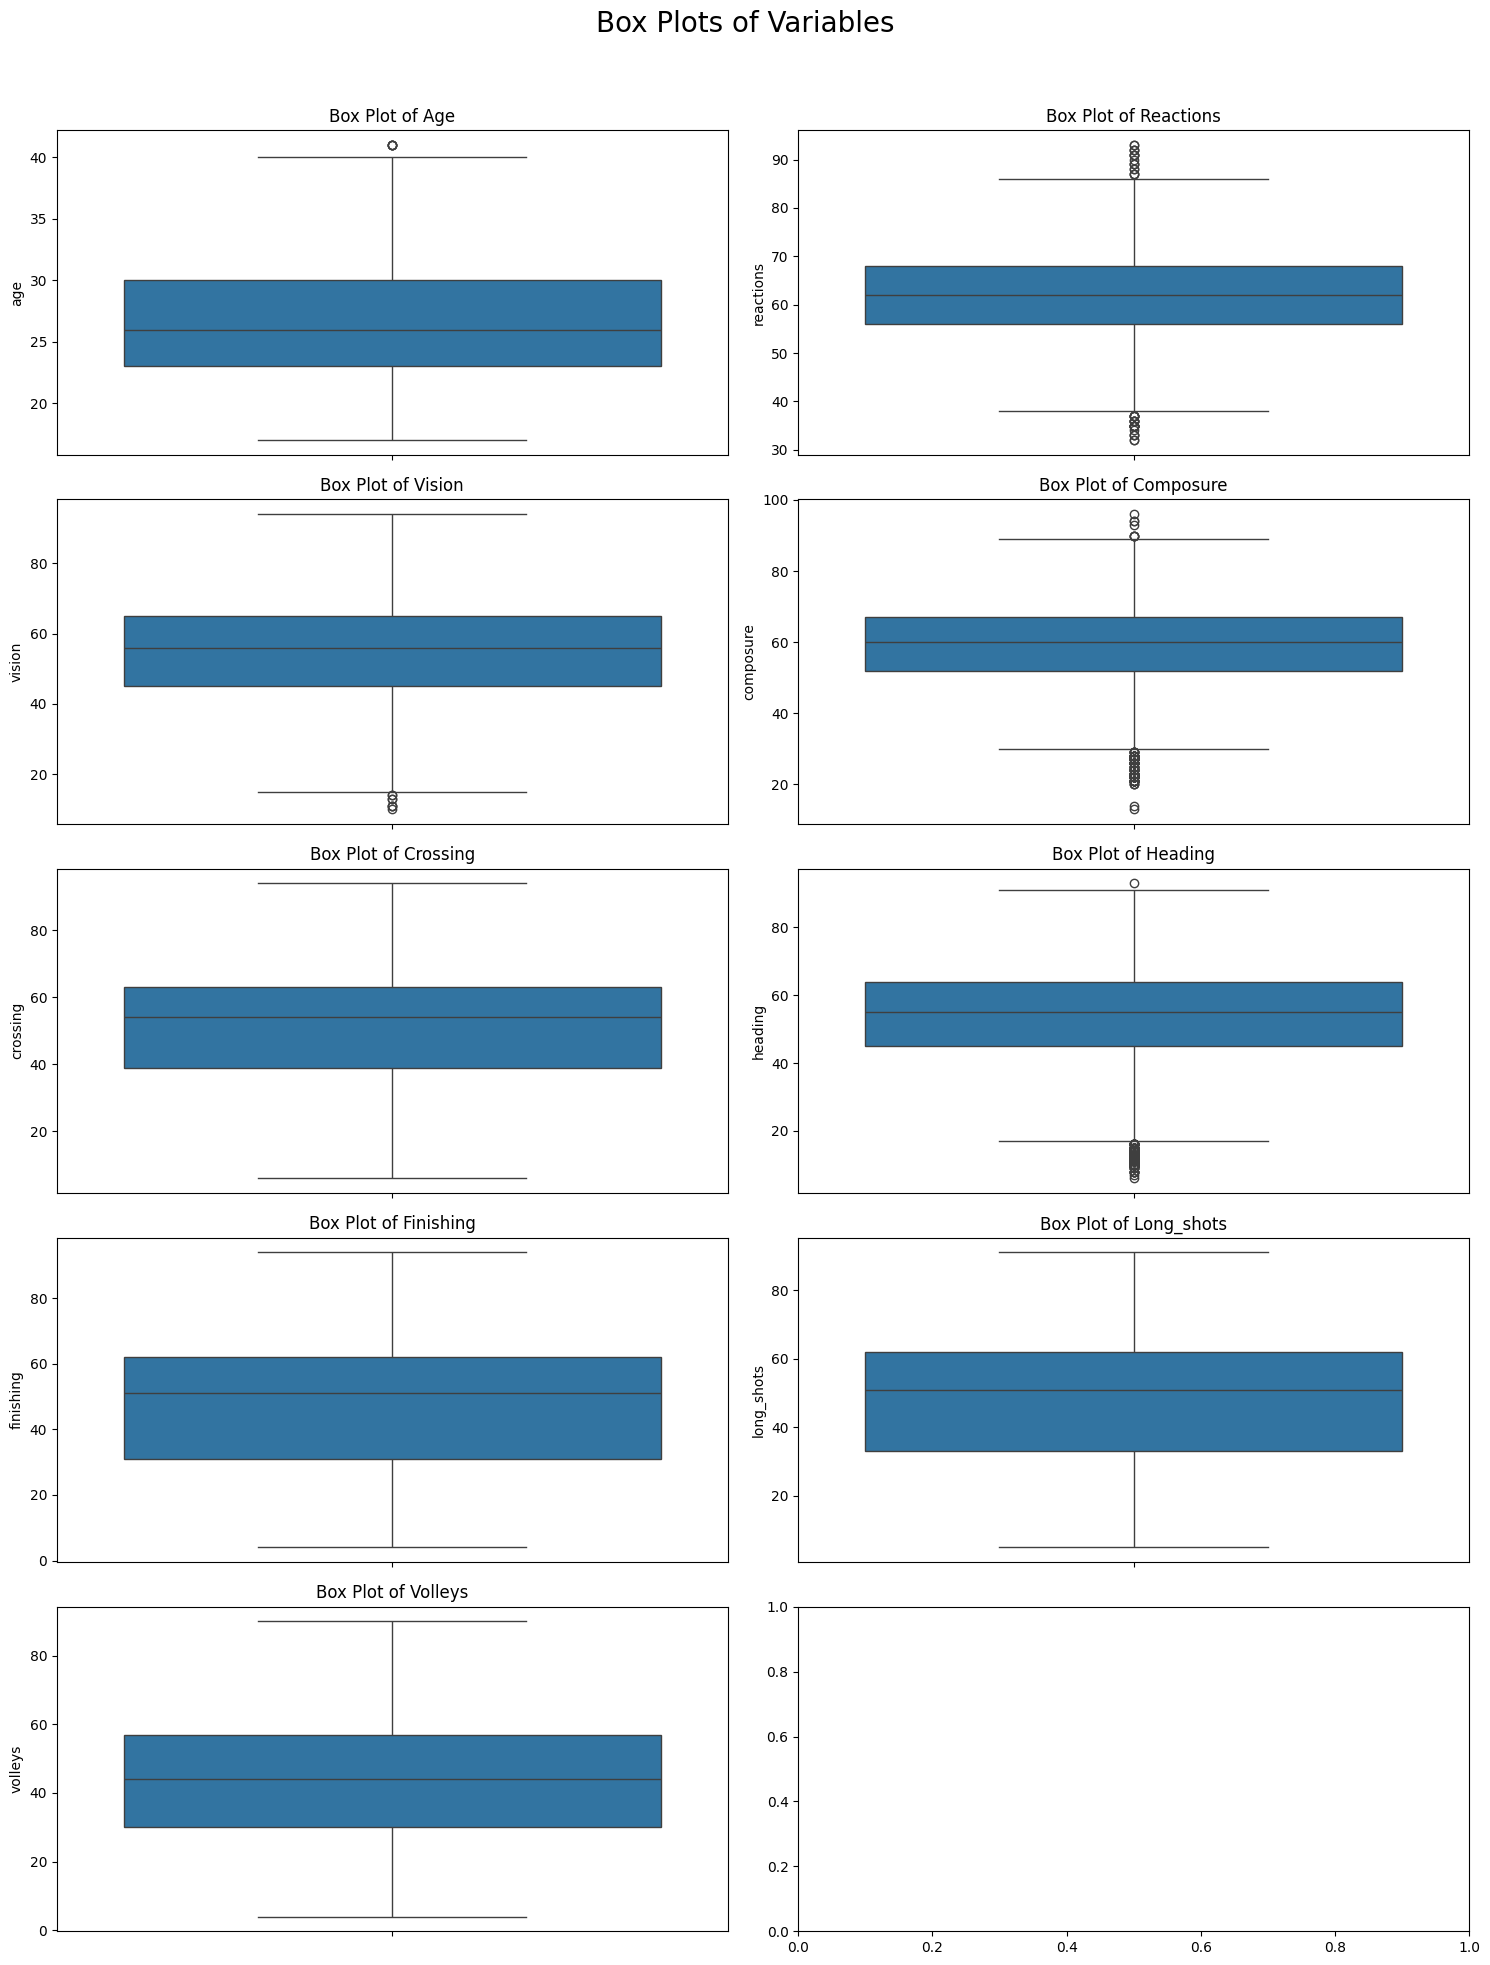

In [14]:
# List of columns to plot
columns = ['age', 'reactions', 'vision', 'composure', 'crossing', 'heading', 'finishing', 'long_shots', 'volleys']
# Set up the matplotlib figure with a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Box Plots of Variables', fontsize=20)

# Create a box plot for each column in the matrix layout
for ax, column in zip(axes.flatten(), columns):
  sns.boxplot(y=df_selected[column], ax=ax)
  ax.set_title(f'Box Plot of {column.capitalize()}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

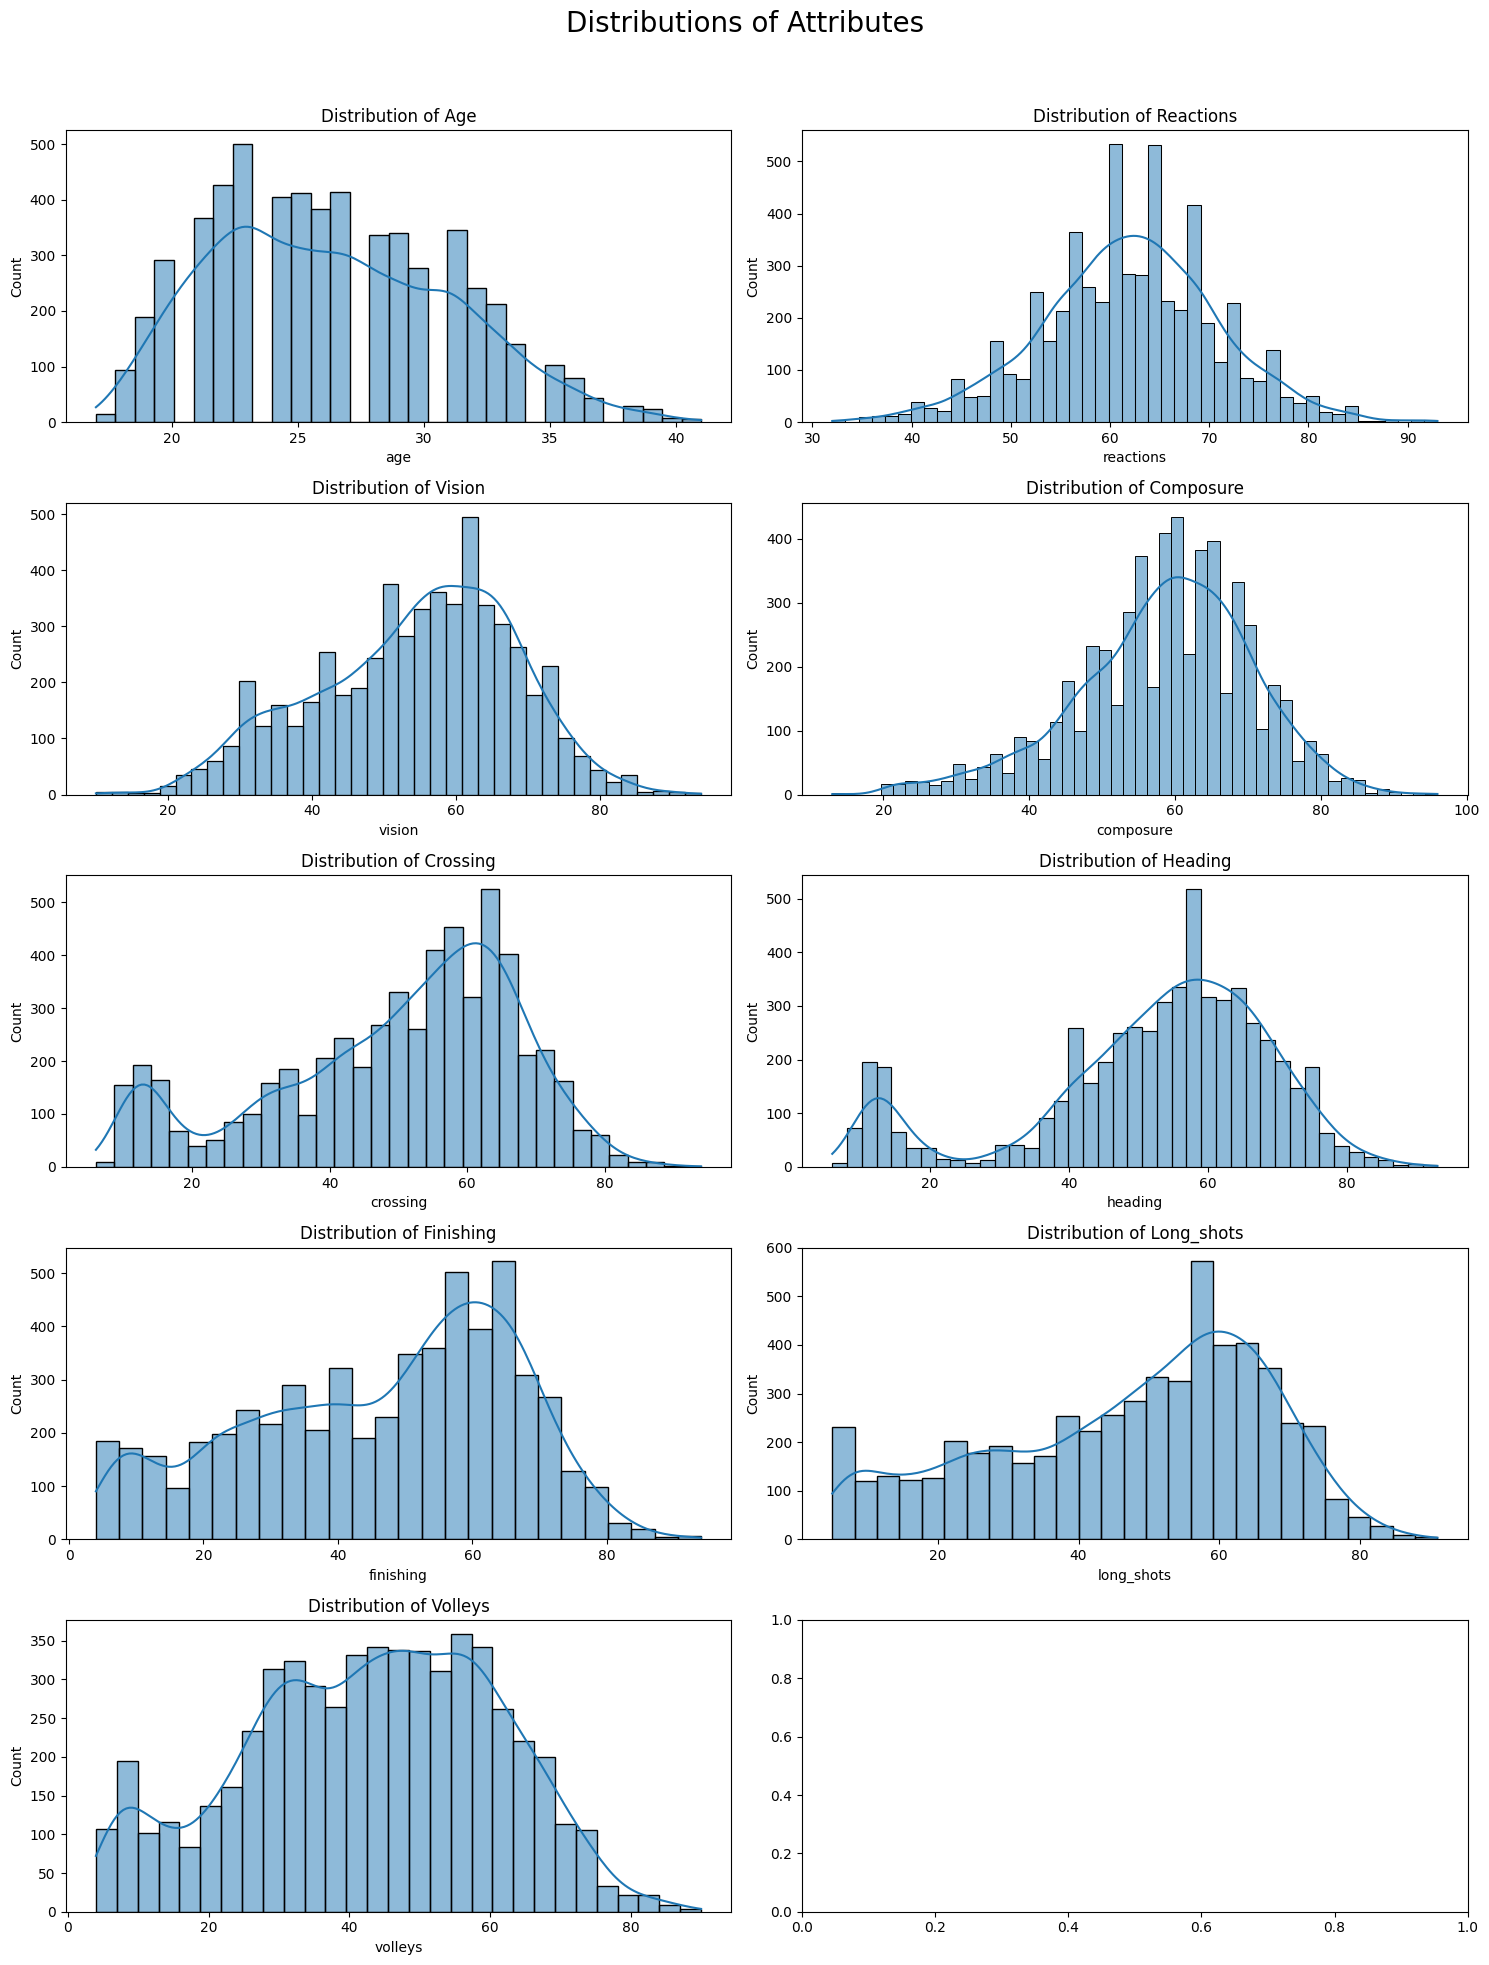

In [15]:
# List of columns to plot
columns = ['age', 'reactions', 'vision', 'composure', 'crossing', 'heading', 'finishing', 'long_shots', 'volleys']
# Set up the matplotlib figure with a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Distributions of Attributes', fontsize=20)

# Create a histogram for each column in the matrix layout
for ax, column in zip(axes.flatten(), columns):
  sns.histplot(df_selected[column], ax=ax, kde=True)
  ax.set_title(f'Distribution of {column.capitalize()}')
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

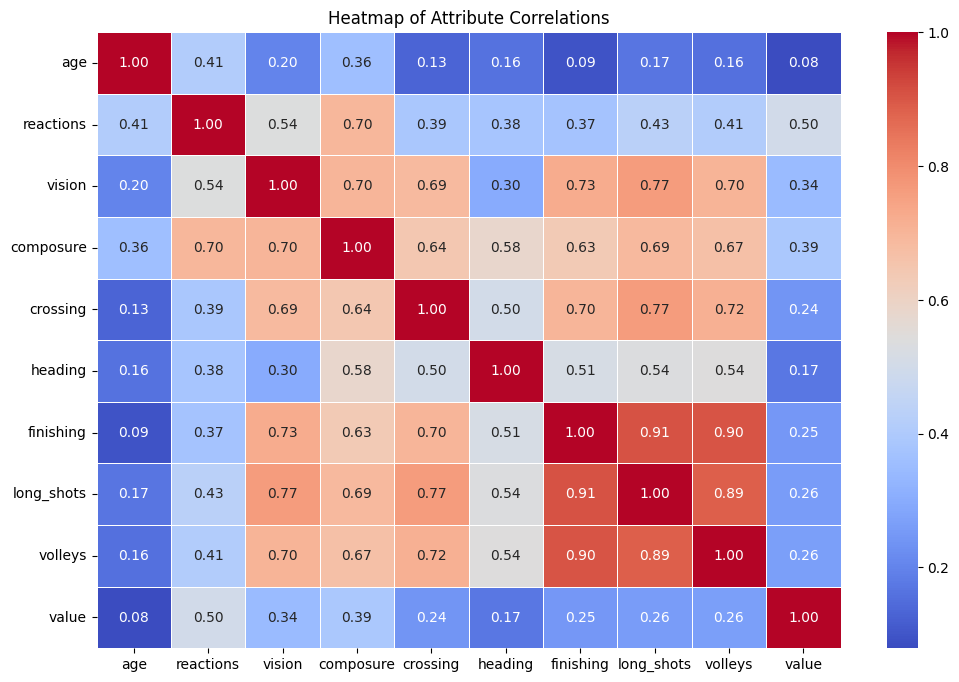

In [16]:

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Attribute Correlations')
plt.show()


**<font color="Red">Observation</font>**


**High Correlations:**

* `Finishing` has a very strong correlation with `long_shots` (0.91) and `volleys` (0.90), suggesting that players who are good at finishing tend to excel at long shots and volleys as well.
* `Long_shots` and `volleys` are also highly correlated (0.89), indicating that players skilled in one tend to be skilled in the other.

**Moderate Correlations:**

* `Vision` has moderate correlations with `finishing` (0.73), `crossing` (0.69), and `volleys` (0.70), implying that players with good vision generally have proficiency in these technical skills.
* `Composure` shows moderate correlations with attributes like `reactions` (0.70) and `vision` (0.70), which may indicate that players who are composed tend to have good reaction times and vision on the field.

**Low Correlations:**

* `Age` has low correlation values with most attributes, with the highest being with `reactions` (0.41). This might imply that age has minimal impact on most technical skills except possibly reaction time.
* `Value` shows a low-to-moderate correlation with other attributes, with the highest being with `reactions` (0.50). This suggests that player value is not strongly associated with any single skill but may be moderately influenced by reaction time.

## **<font color="Teal">Linear Regression model without regularization**


We will use `Value` as the target variable and remaining attributes as predictors for the Linear Regression without regularization.

In [20]:
# Defining predictors and target variable
X = df_selected[['age', 'reactions', 'vision', 'composure', 'crossing', 'heading', 'finishing', 'long_shots', 'volleys']]
y = df_selected['value']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Mean Squared Error (MSE): 56160390703448.69
R-squared (R2): 0.2662624322296887
Model Coefficients: [-227803.54952659  394535.40249066   44514.70992531   67803.63470343
    4001.2284272   -27393.94362381    8919.8700902   -52498.42573114
   35924.37263751]
Model Intercept: -20873652.290317915


## **<font color="Teal">Making Prediction (Without Regularization)**

Based on the coefficients and intercepts, we can write the following regression equation

<font color="Red">`value` = (−20873652.29) + (−227803.55 X `age`) + (394535.40 X `reactions`) + (44514.71 X `vision`) + (67803.63 X `composure`) + (4001.23 X `crossing`)+ (−27393.94 X `heading`) + (8919.87 X `finishing`) + (−52498.43 X `long_shots`) + (35924.37 X `volleys`)</font>

Let us consider the following data points

  

*   `age` : 25
*   `reactions` : 80
* `vision` : 75
* `composure` : 70
* `crossing` : 60
* `heading` : 65
* `finishing` : 70
* `long_shots` : 68
* `volleys` : 66




In [27]:

new_data = {
    'age': 25,
    'reactions': 80,
    'vision': 75,
    'composure': 70,
    'crossing': 60,
    'heading': 65,
    'finishing': 70,
    'long_shots': 68,
    'volleys': 66
}

# Convert new data to a DataFrame
new_data_df = pd.DataFrame([new_data])

# Ensure that new_data_df has the same structure as the training data
# Add a constant term (intercept) to new_data_df
new_data_df = sm.add_constant(new_data_df, has_constant='add')

# Predict using the regression model
predicted_value = model.predict(new_data_df)[0]
print("Predicted Value:", predicted_value)

Predicted Value: 11392700.673973173


## **<font color="Teal">Training and Testing error (Without Regularization)**

In [33]:
# Adding a constant to X_train and X_test for the intercept
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Predicting on training and testing data
y_train_pred = model.predict(X_train_with_const)
y_test_pred = model.predict(X_test_with_const)

# Calculating errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MSE: 38158686857926.36
Testing MSE: 55918017286531.45


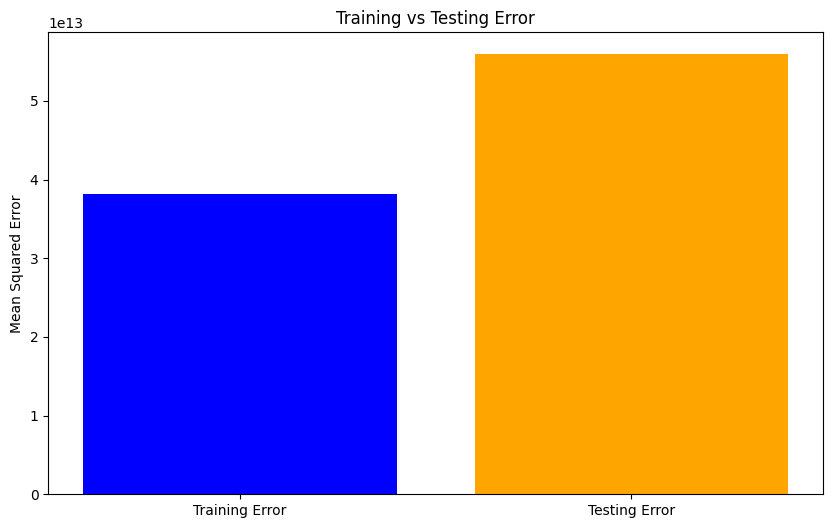

In [32]:
# Adding a constant to X_train and X_test for the intercept
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Predicting on training and testing data
y_train_pred = model.predict(X_train_with_const)
y_test_pred = model.predict(X_test_with_const)

# Calculating Mean Squared Error (MSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Plotting the MSE values for training and testing sets
plt.figure(figsize=(10, 6))
plt.bar(['Training Error', 'Testing Error'], [train_mse, test_mse], color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Training vs Testing Error')
plt.show()

##<font color="Teal">**Observations (Without Regularization)**

* **Model Fit (R²)**: The R² value is approximately 0.27, meaning the model explains about 27% of the variance in value. This is relatively low, suggesting that the model does not capture much of the variability in the target variable. There may be other influential variables not included in this model or a non-linear relationship that isn't well modeled by linear regression.

* **Mean Squared Error (MSE)**: The MSE value is quite high, indicating that the predictions may have significant deviations from actual values. This might suggest that the model is overfitting or underfitting the data.


* **Coefficients:** Some of the predictors, such as reactions and composure, have relatively high coefficients, which may indicate they are more influential in predicting value. However, other predictors like heading and crossing have smaller or even negative coefficients, which may suggest a weaker relationship with value.

* **Model Complexity**: Since this model does not include regularization, it may be more susceptible to overfitting, especially if there are collinearities among predictors.

* **Recommendation:** To improve the model, consider feature selection, regularization techniques (such as Ridge or Lasso regression), or using a different model that can capture potential non-linear relationships, such as a decision tree or random forest.



##<font color="Teal">**Linear Regression model with regularization**



### <font color="Brown">**Train Ridge and Lasso Model**

In [39]:
# Define predictors and target variable
X = df[['age', 'reactions', 'vision', 'composure', 'crossing', 'heading', 'finishing', 'long_shots', 'volleys']]
y = df['value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge Regression model with a regularization strength of alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the results for Ridge Regression
print("Ridge Regression Results:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R2):", r2_ridge)
print("Model Coefficients:", ridge_model.coef_)
print("Model Intercept:", ridge_model.intercept_)

Ridge Regression Results:
Mean Squared Error (MSE): 56160413225442.85
R-squared (R2): 0.26626213797900755
Model Coefficients: [-227799.8894734   394532.79266857   44515.06786951   67803.98977306
    4001.18185749  -27393.76347609    8919.91623499  -52498.23928581
   35924.08769377]
Model Intercept: -20873632.95251608


In [40]:
# Create and train the Lasso Regression model with a regularization strength of alpha=1.0
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate evaluation metrics for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Display the results for Lasso Regression
print("Lasso Regression Results:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R2):", r2_lasso)
print("Model Coefficients:", lasso_model.coef_)
print("Model Intercept:", lasso_model.intercept_)


Lasso Regression Results:
Mean Squared Error (MSE): 56160391049110.9
R-squared (R2): 0.2662624277135992
Model Coefficients: [-227803.48564033  394535.37889006   44514.70868839   67803.61799287
    4001.21992683  -27393.93376179    8919.8530788   -52498.38436235
   35924.35804018]
Model Intercept: -20873652.09225439


## **<font color="Teal">Making Prediction (With Regularization)**

**Ridge Regression**

<font color="Red">`value` = (−20873652.95) + (−227799.89 X `age`) + (394532.79 X `reactions`) + (44515.06 X `vision`) + (67803.99 X `composure`) + (4001.18 X `crossing`)+ (−27393.76 X `heading`) + (8919.91 X `finishing`) + (−52498.23 X `long_shots`) + (35924.08 X `volleys`)</font>

**Lasso Regression**

<font color="Red">`value` = (−20873652.09) + (−227803.48 X `age`) + (394535.37 X `reactions`) + (44515.70 X `vision`) + (67803.61 X `composure`) + (4001.22 X `crossing`)+ (−27393.93 X `heading`) + (8919.85 X `finishing`) + (−52498.38 X `long_shots`) + (35924.35 X `volleys`)</font>

In [50]:
# Example new data point (replace these values with actual data)
new_data = [[25, 80, 75, 70, 60, 65, 70, 68, 66]]  # Example input data

# Standardize the new data using the same scaler that was fitted on training data
new_data_scaled = scaler.transform(new_data)

# Make prediction using the Ridge Regression model
ridge_prediction = ridge_model.predict(new_data_scaled)
print(f"Predicted Value using Ridge Regression: {ridge_prediction[0]}")

# Make prediction using the Lasso Regression model
lasso_prediction = lasso_model.predict(new_data_scaled)
print(f"Predicted Value using Lasso Regression: {lasso_prediction[0]}")


Predicted Value using Ridge Regression: 10961268.529122414
Predicted Value using Lasso Regression: 10963918.338775793


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **<font color="Teal">Training and Testing error (With Regularization)**

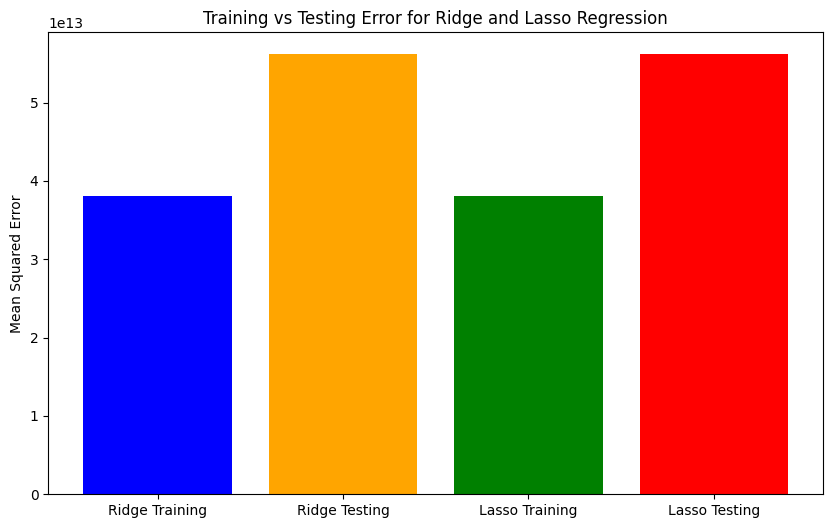

In [47]:
# Bar plot for comparison
labels = ['Ridge Training', 'Ridge Testing', 'Lasso Training', 'Lasso Testing']
errors = [train_error_ridge, test_error_ridge, train_error_lasso, test_error_lasso]

plt.figure(figsize=(10, 6))
plt.bar(labels, errors, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('Training vs Testing Error for Ridge and Lasso Regression')
plt.show()

##<font color="Teal">**Observations (With Regularization)**

* **MSE**: The MSE values for all models (without regularization, Ridge, and Lasso) are very similar, indicating that regularization does not significantly affect the performance of the model in this case. This suggests that the model may not be highly sensitive to overfitting or that regularization isn’t needed

* **Coefficients**: The coefficients in all three models (without regularization, Ridge, and Lasso) are nearly identical. This means that Ridge and Lasso regularization had little to no effect in shrinking the coefficients or eliminating features, which indicates that the dataset might not have issues of multicollinearity or high variance.

* **R-squared (R²) Value**: The R² value for all models is 0.266, which is quite low. This indicates that the model is not capturing much of the variance in the target variable. In other words, only 26.6% of the variability in value is explained by the input features.

* **Regularization Effect:** Ridge and Lasso regularization did not improve the performance of the model significantly. This suggests that overfitting may not be a major concern, or regularization is not necessary for this dataset.
